# Exploratory Data Analysis 

 ### Three important steps :
* Understanding the data
* Cleaning the data
* Find the relationship between data

Dataset - Titanic data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
data.shape

(891, 15)

In [7]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

### Cleaning the data

In [12]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# Removing missing value column(cleaning the data)
newdata = data.drop(['deck'], axis=1)
newdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [14]:
newdata.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
newdata.shape

(891, 14)

In [16]:
newdata.dropna().shape

(712, 14)

In [17]:
newdata = newdata.dropna()

In [18]:
newdata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [19]:
newdata['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [20]:
newdata.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Checking for outliers

In [21]:
newdata.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

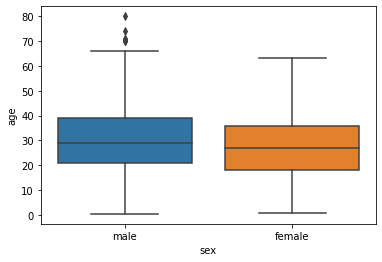

In [22]:
sns.boxplot(x ='sex', y='age', data=newdata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

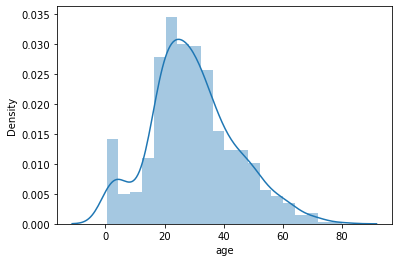

In [23]:
sns.distplot(newdata['age'])

### Removing the outliers

In [24]:
newdata['age'].mean()

29.64209269662921

In [25]:
data['age'] = newdata['age'] < 69
data['age'].mean()


0.9901685393258427

In [26]:
newdata = newdata[newdata['age']<69]
newdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [27]:
newdata.shape

(705, 14)

In [28]:
newdata['age'].mean()

29.21797163120567

<AxesSubplot:xlabel='sex', ylabel='age'>

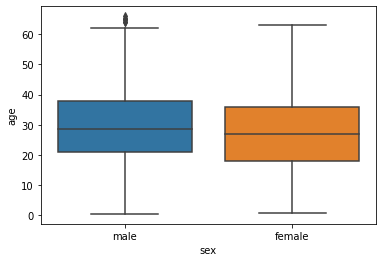

In [29]:
sns.boxplot(x ='sex', y='age', data=newdata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

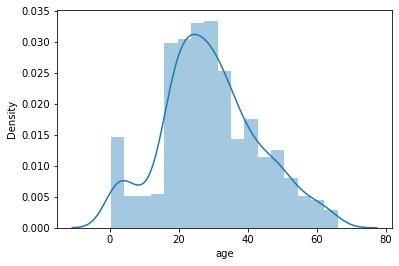

In [30]:
sns.distplot(newdata['age'])

<AxesSubplot:>

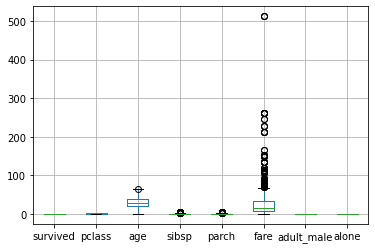

In [31]:
newdata.boxplot()

In [32]:
data['age'] = newdata['fare'] < 300
data['age'].mean()

0.9957446808510638

<AxesSubplot:>

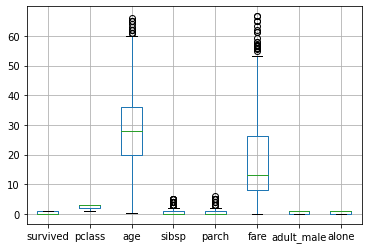

In [33]:
newdata = newdata[newdata['fare']<69]
newdata.boxplot()

<AxesSubplot:>

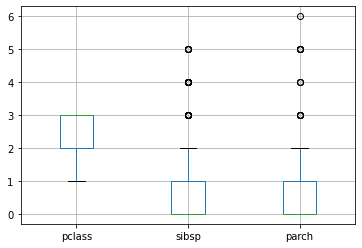

In [34]:
newdata.boxplot(column=['pclass','sibsp','parch'])

In [82]:
# log transformation
newdata['fare_log'] = np.log(newdata['fare'])
newdata.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,3.948596


In [35]:
newdata[['sibsp']].groupby(['sibsp']).agg({'sibsp':['count']})

,sibsp
,count
sibsp,
0,418
1,141
2,18
3,9
4,18
5,5


In [36]:
newdata[['parch']].groupby(['parch']).agg({'parch':['count']})

,parch
,count
parch,
0,456
1,90
2,49
3,5
4,3
5,5
6,1


<AxesSubplot:>

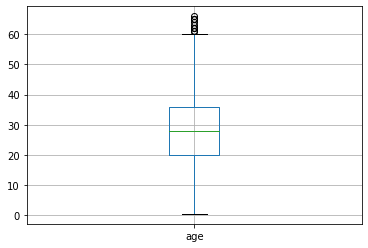

In [38]:
newdata.boxplot(column=['age'])

### Kurtosis and Skewness

* Kurtosis is a measure of spread of tail of a data distribution. There are 3 types of kurtosis - high, medium and low. 

In [40]:
newdata.kurt()

C:\Users\elizr\AppData\Local\Temp\ipykernel_16432\2915909468.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newdata.kurt()


survived      -1.643604
pclass        -0.622273
age           -0.017044
sibsp          7.352063
parch         10.527309
fare           1.358940
adult_male    -1.804613
alone         -1.823236
dtype: float64

* Skewness is the measure of asymmetry of distribution. Positive value of skew is right skewed and negative value is left skewed.

In [41]:
newdata.skew()

C:\Users\elizr\AppData\Local\Temp\ipykernel_16432\1631795814.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newdata.skew()


survived      0.601502
pclass       -0.882995
age           0.253811
sibsp         2.632998
parch         2.877652
fare          1.393232
adult_male   -0.448692
alone        -0.427507
dtype: float64

<AxesSubplot:ylabel='Frequency'>

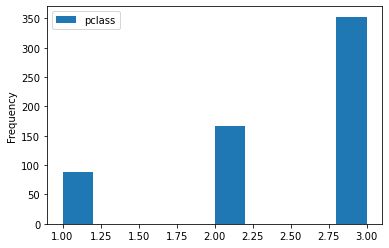

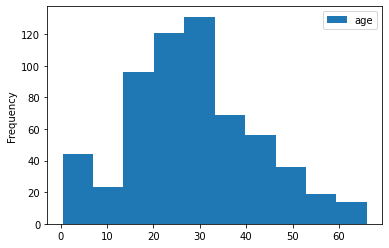

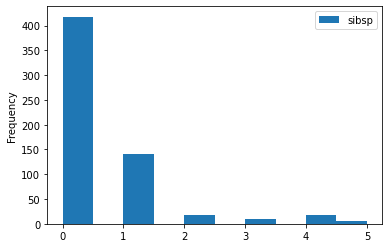

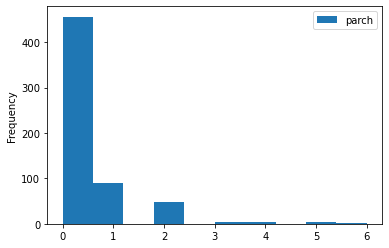

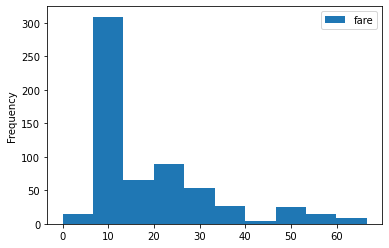

In [57]:
newdata[['pclass']].plot.hist()
newdata[['age']].plot.hist()
newdata[['sibsp']].plot.hist()
newdata[['parch']].plot.hist()
newdata[['fare']].plot.hist()

<AxesSubplot:ylabel='Density'>

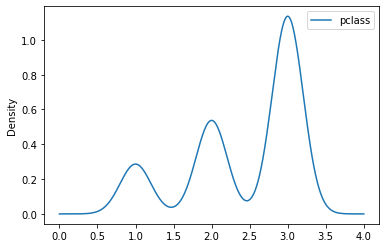

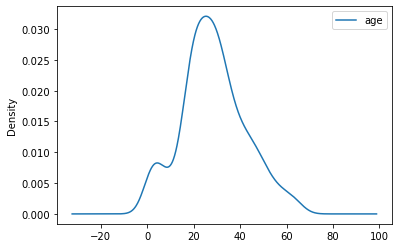

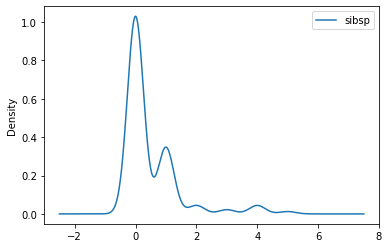

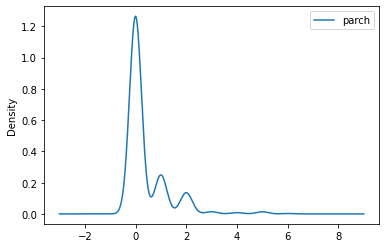

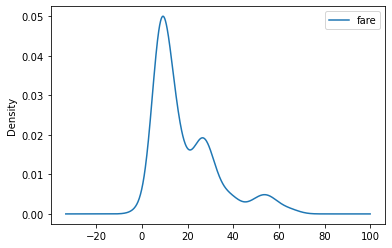

In [56]:
newdata[['pclass']].plot.kde()
newdata[['age']].plot.kde()
newdata[['sibsp']].plot.kde()
newdata[['parch']].plot.kde()
newdata[['fare']].plot.kde()

<AxesSubplot:>

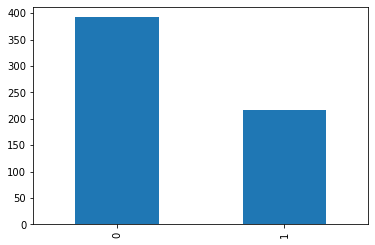

In [42]:
pd.value_counts(newdata['survived']).plot.bar()

<AxesSubplot:>

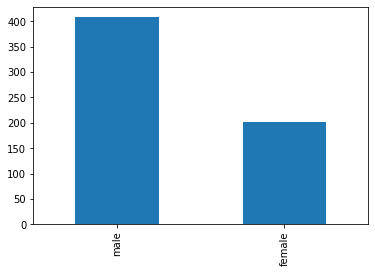

In [43]:
pd.value_counts(newdata['sex']).plot.bar()

<AxesSubplot:>

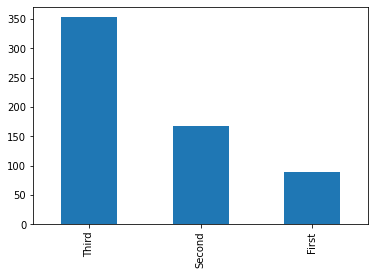

In [44]:
pd.value_counts(newdata['class']).plot.bar()

## Relationship between the data

### Correlation 
* Dataframe correlation is used to find how pair of variables behave with each other. 
* Correlation varies from -1 to +1. -1 means variables movements ae opposite i.e., if one increases other decreases at the same rate. +1 means variable movements are in sync i.e., if one increases other also increases at same rate. 0 means variable are uncorrelated.
* Pandas data frame function provides three kinds of correlations – pearson, kendall and spearman.

Let’s see these correlation matrices:

In [42]:
corr = newdata.corr()
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,fare_log
survived,1.000000,-0.271479,-0.130809,-0.025974,0.098131,0.228695,-0.507316,-0.190197,0.247448
pclass,-0.271479,1.000000,-0.381791,0.122815,0.108867,-0.597647,-0.008386,0.038794,-0.641957
age,-0.130809,-0.381791,1.000000,-0.360578,-0.212952,0.080849,0.334282,0.277025,0.073797
sibsp,-0.025974,0.122815,-0.360578,1.000000,0.402079,0.382489,-0.356309,-0.637921,0.419778
parch,0.098131,0.108867,-0.212952,0.402079,1.000000,0.340278,-0.410916,-0.586820,0.400886
fare,0.228695,-0.597647,0.080849,0.382489,0.340278,1.000000,-0.220501,-0.494395,0.955339
adult_male,-0.507316,-0.008386,0.334282,-0.356309,-0.410916,-0.220501,1.000000,0.452941,-0.278705
alone,-0.190197,0.038794,0.277025,-0.637921,-0.586820,-0.494395,0.452941,1.000000,-0.548428
fare_log,0.247448,-0.641957,0.073797,0.419778,0.400886,0.955339,-0.278705,-0.548428,1.000000


<AxesSubplot:>

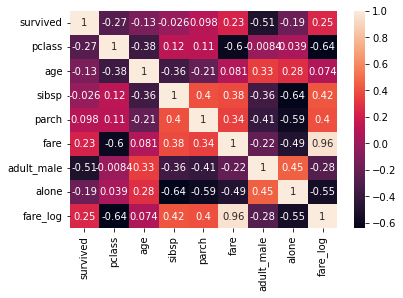

In [44]:
sns.heatmap(corr, annot=True)

In [58]:
corr = newdata.corr(method='pearson')
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.271479,-0.130809,-0.025974,0.098131,0.228695,-0.507316,-0.190197
pclass,-0.271479,1.000000,-0.381791,0.122815,0.108867,-0.597647,-0.008386,0.038794
age,-0.130809,-0.381791,1.000000,-0.360578,-0.212952,0.080849,0.334282,0.277025
sibsp,-0.025974,0.122815,-0.360578,1.000000,0.402079,0.382489,-0.356309,-0.637921
parch,0.098131,0.108867,-0.212952,0.402079,1.000000,0.340278,-0.410916,-0.586820
fare,0.228695,-0.597647,0.080849,0.382489,0.340278,1.000000,-0.220501,-0.494395
adult_male,-0.507316,-0.008386,0.334282,-0.356309,-0.410916,-0.220501,1.000000,0.452941
alone,-0.190197,0.038794,0.277025,-0.637921,-0.586820,-0.494395,0.452941,1.000000


<AxesSubplot:>

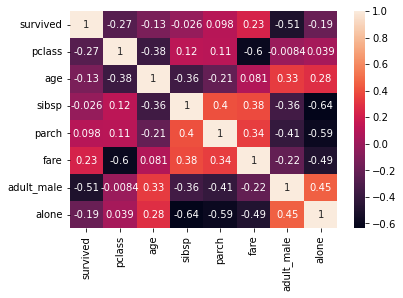

In [59]:
sns.heatmap(corr, annot=True)

In [60]:
corr = newdata.corr('spearman')
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.282739,-0.104960,0.059791,0.168304,0.248687,-0.507316,-0.190197
pclass,-0.282739,1.000000,-0.359963,0.018470,0.059367,-0.596141,0.017669,0.051076
age,-0.104960,-0.359963,1.000000,-0.235822,-0.304770,0.079934,0.312881,0.235116
sibsp,0.059791,0.018470,-0.235822,1.000000,0.472754,0.469199,-0.343953,-0.823662
parch,0.168304,0.059367,-0.304770,0.472754,1.000000,0.457092,-0.478950,-0.708222
fare,0.248687,-0.596141,0.079934,0.469199,0.457092,1.000000,-0.306250,-0.546444
adult_male,-0.507316,0.017669,0.312881,-0.343953,-0.478950,-0.306250,1.000000,0.452941
alone,-0.190197,0.051076,0.235116,-0.823662,-0.708222,-0.546444,0.452941,1.000000


<AxesSubplot:>

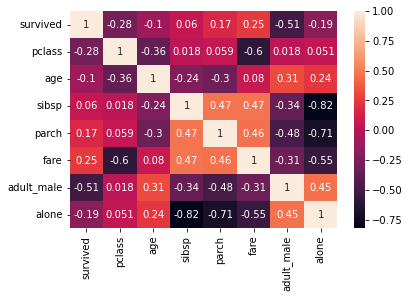

In [61]:
sns.heatmap(corr, annot=True)

In [62]:
corr = newdata.corr('kendall')
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.270918,-0.086662,0.057834,0.162771,0.204927,-0.507316,-0.190197
pclass,-0.270918,1.000000,-0.287199,0.018169,0.055773,-0.502663,0.016931,0.048941
age,-0.086662,-0.287199,1.000000,-0.186571,-0.242615,0.058565,0.258336,0.194128
sibsp,0.057834,0.018169,-0.186571,1.000000,0.445959,0.377850,-0.332697,-0.796706
parch,0.162771,0.055773,-0.242615,0.445959,1.000000,0.368592,-0.463205,-0.684939
fare,0.204927,-0.502663,0.058565,0.377850,0.368592,1.000000,-0.252361,-0.450290
adult_male,-0.507316,0.016931,0.258336,-0.332697,-0.463205,-0.252361,1.000000,0.452941
alone,-0.190197,0.048941,0.194128,-0.796706,-0.684939,-0.450290,0.452941,1.000000


<AxesSubplot:>

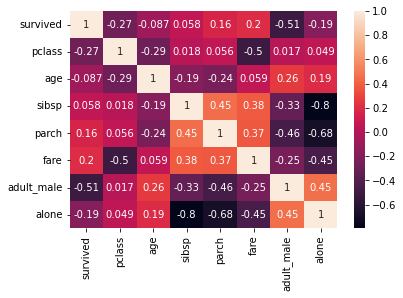

In [63]:
sns.heatmap(corr, annot=True)

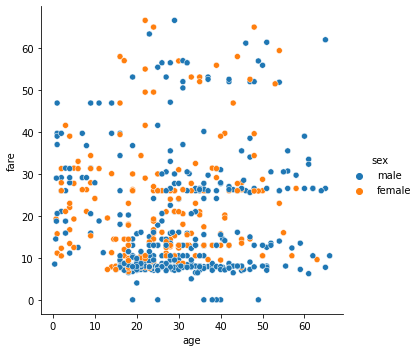

In [45]:
sns.relplot(x='age',y='fare', hue='sex', data=newdata)

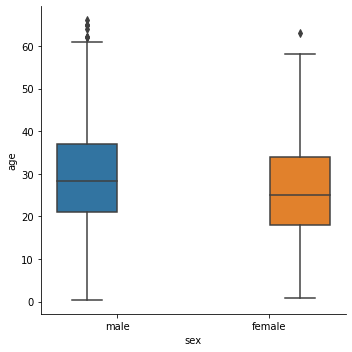

In [46]:

sns.catplot(x='sex',y='age', hue='sex', data=newdata, kind='box')

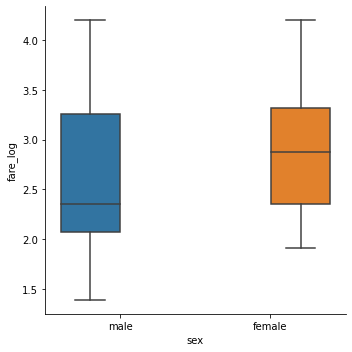

In [47]:
sns.catplot(x='sex', y='fare_log', hue='sex', data=newdata, kind='box')